##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number:*** 16

---
(*In Title case, separated with commas*)
***Full names of all students in the team:*** Aryan Gupta, Mihir Kulkarni, Vaibhav Khanna, Darsh Shani

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0162H, 2021A7PS2689H, 2021A7PS2819H, 2021A7PS2171H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

## Making Required Imports

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
# removing irrelevant deprecation warnings
warnings.filterwarnings('ignore',category=FutureWarning)

## Loading the Dataset

In [50]:
dataset = pd.read_csv("Team16_Carbon_Emissions.csv")
dataset.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Checking for Null or Missing Values in the Dataset

In [51]:
dataset.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [52]:
dataset[dataset == 0].count()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

**Inference**: No null or 0 values are present in the dataset.

## Checking for Duplicated Data in the Dataset

In [53]:
print("Number of duplicates:", dataset.duplicated().sum())
# print unique duplicated rows
print("Number of duplicated unique rows:", dataset[dataset.duplicated(keep=False)].drop_duplicates().shape)

Number of duplicates: 1103
Number of duplicated unique rows: (999, 12)


**Inference**: We see 1103 duplicates of 999 unique rows in the data. 
Why should we remove duplicates?
1. The duplicates only lead to overfitting and bias for our dataset, since the feature AND the target values are the same (since we consider a complete row in the dataset for duplicate identification).
2. The target variable (CO2 emmisions) is continuous. Thus, the duplicates are a result of error in data retrieval.

### Removing Duplicates

In [54]:
dataset = dataset.drop_duplicates()

## Getting Dataset info After Cleaning

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: float64(

In [56]:
# printing the unique values in all columns
# out of these the values in catagorical columns are informativ
for col in dataset.select_dtypes(include="object").columns:
  print(col, len(dataset[col].unique()))

Make 42
Model 2053
Vehicle Class 16
Transmission 27
Fuel Type 5


**Inference**: The dataset contains 5 qualitative columns (indicated by data type object), these are nominal catagorical columns and cannot be represented as integers. Out of these columns *Model* has 2053 unique values, 42 for *Make*, 16 for *Vehicle class*, 27 for *Transmission* and 5 for *Fuel Type*. 

In [57]:
print(dataset["Model"].value_counts().mean())
dataset["Model"].value_counts()

3.059912323429128


Model
F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               27
FOCUS FFV             24
F-150 4X4             20
                      ..
LS 500                 1
LS 500h                1
NX 300 AWD F SPORT     1
RX 350 L AWD           1
XC40 T4 AWD            1
Name: count, Length: 2053, dtype: int64

**Note**: There are 2053 unique values for the *Model* field on printing its distribution, we see that on average there are only 3 datapoints per value of the column. There are far too little instances of multiple models to fairly compare them to eachother. Not only this, but binarising this value in the next step would be extremely messy, producing 2053 new columns. Thus we drop this column.

### Dropping "Model"

In [58]:
dataset.drop("Model", axis = 1, inplace = True)

### Description of the numerical columns

In [59]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


## Initial Data Plots

### Exploring Categorical Features impact on co2 emmisions

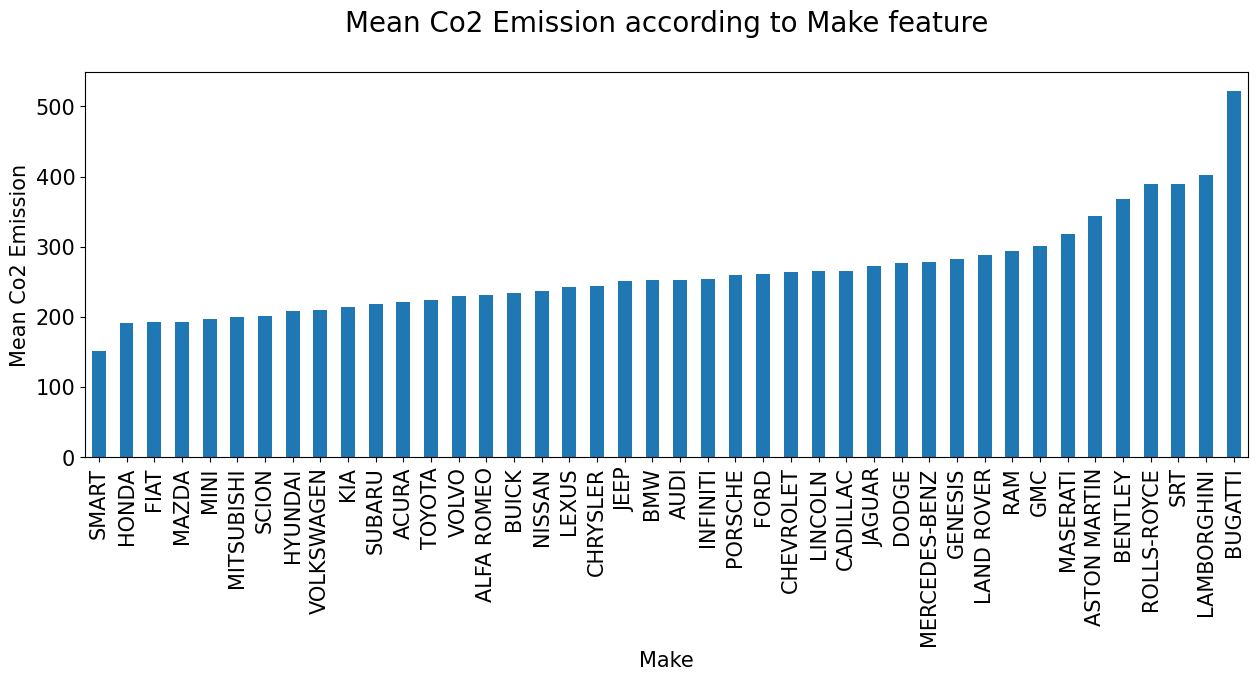

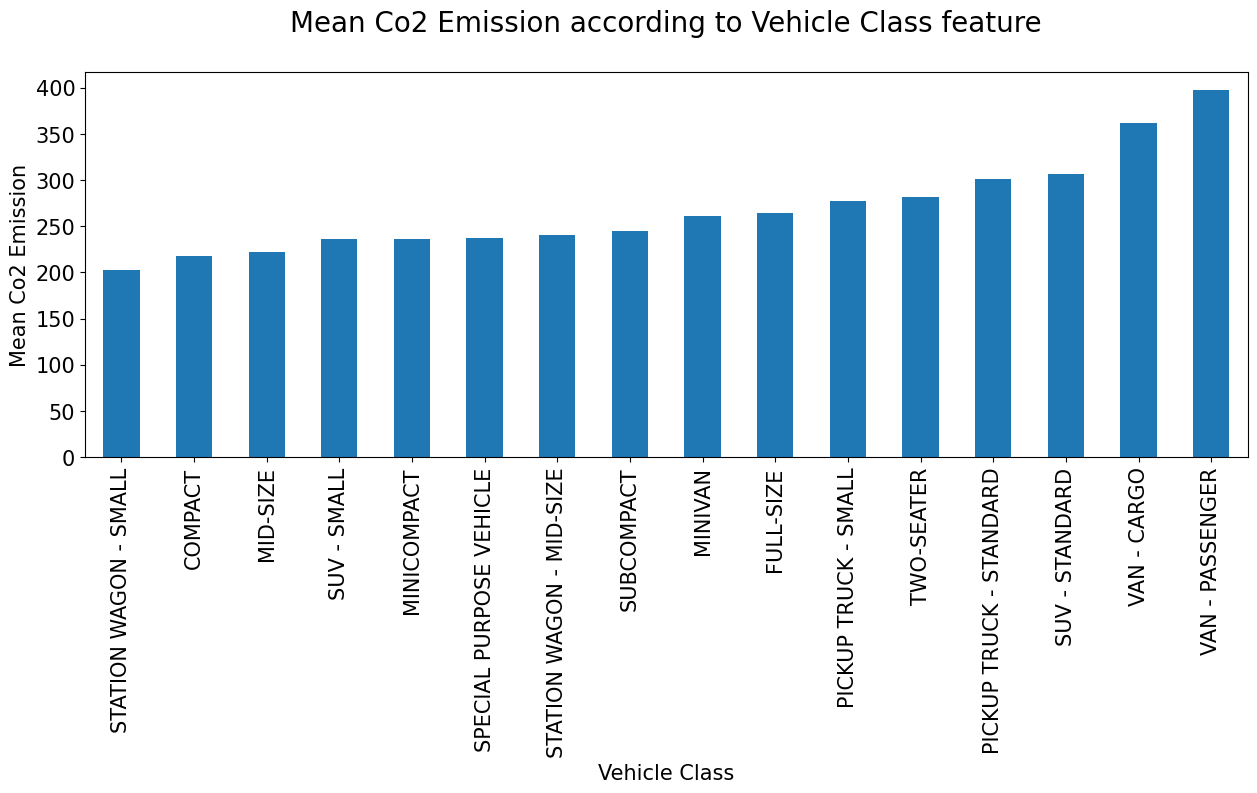

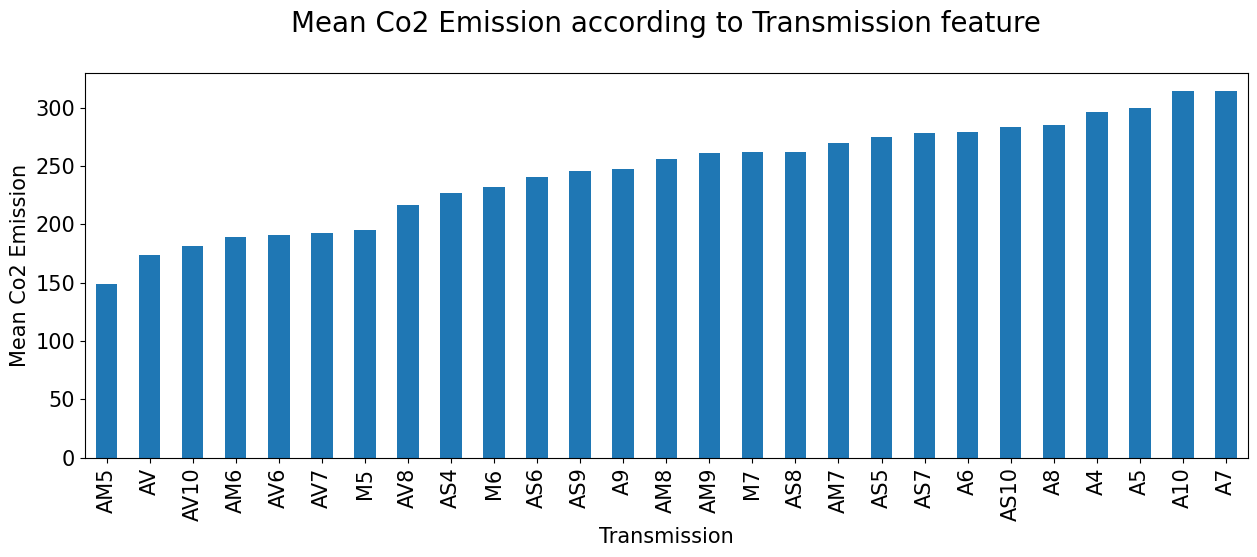

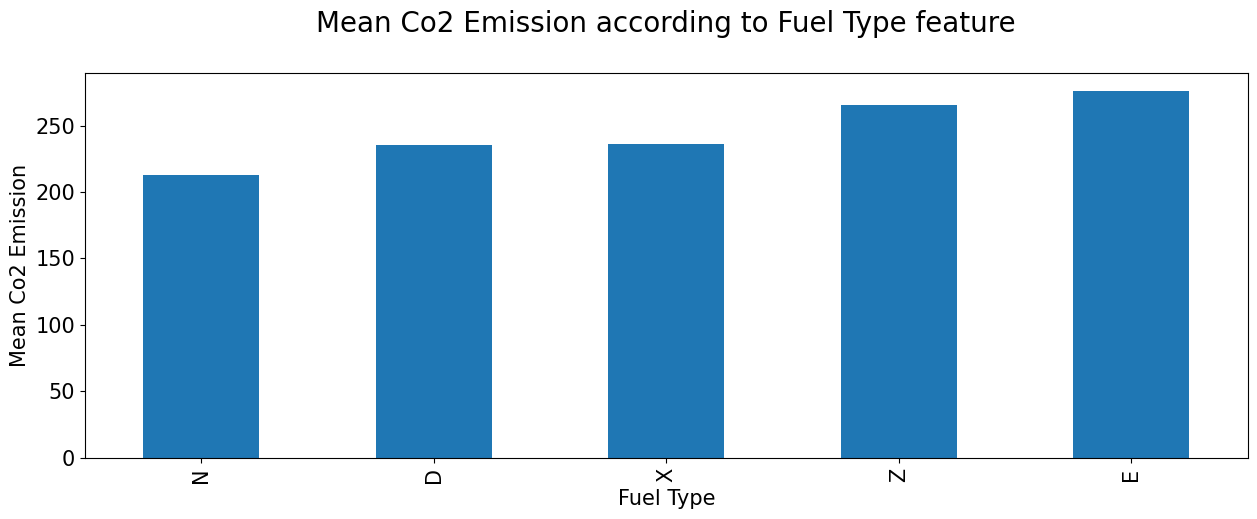

In [64]:
def explore_categorical_feature(feature):
  group = dataset.groupby(feature)
  plt.figure(figsize=[15,5])
  plots = group['CO2 Emissions(g/km)'].mean().sort_values().plot(kind = 'bar', fontsize=15)
  plt.xlabel(feature, fontsize=15);
  plt.ylabel('Mean Co2 Emission', fontsize=15);
  plt.title("Mean Co2 Emission according to {} feature\n".format(feature), fontsize=20)
  plt.show()
for feature in ["Make", 'Vehicle Class', 'Transmission', 'Fuel Type']:
  explore_categorical_feature(feature)

**Inference**: According to aboce plots: Cars of luxurious *Make* tend to have more co2 emmisions than economic cars. Other plots are not as conclusive, larger *Vehicle Class* tends to have more emmisions, but two-wheelers seem to be an exception. Similarly *Transmission* and *Fuel Type* are inconclusive on their own.

### Exploring the impact of Numerical features

#### Correlation Table

In [66]:
dataset[dataset.describe().columns].corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


#### Correlation Heatmap

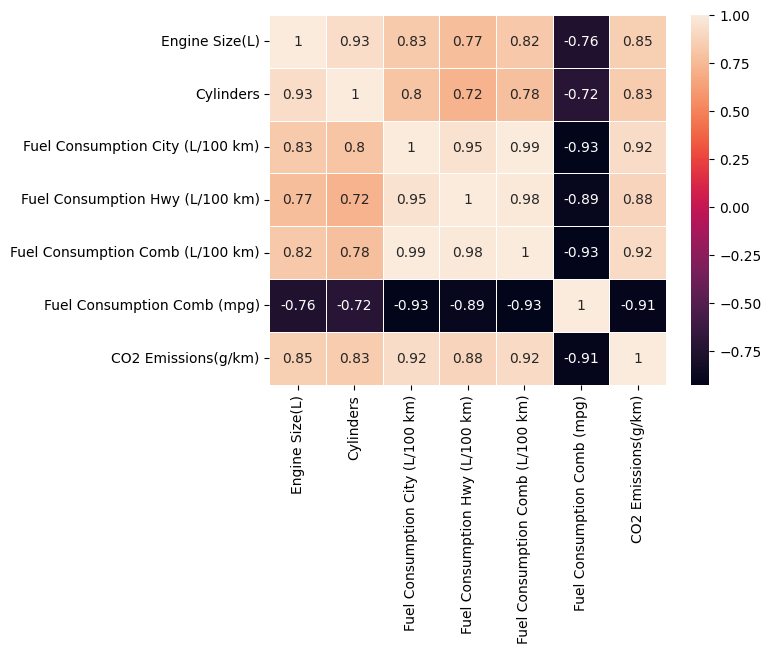

In [69]:
sns.heatmap(dataset.select_dtypes(include=np.number).corr(), linewidths=0.5, annot=True)
plt.show()

#### Pairplot

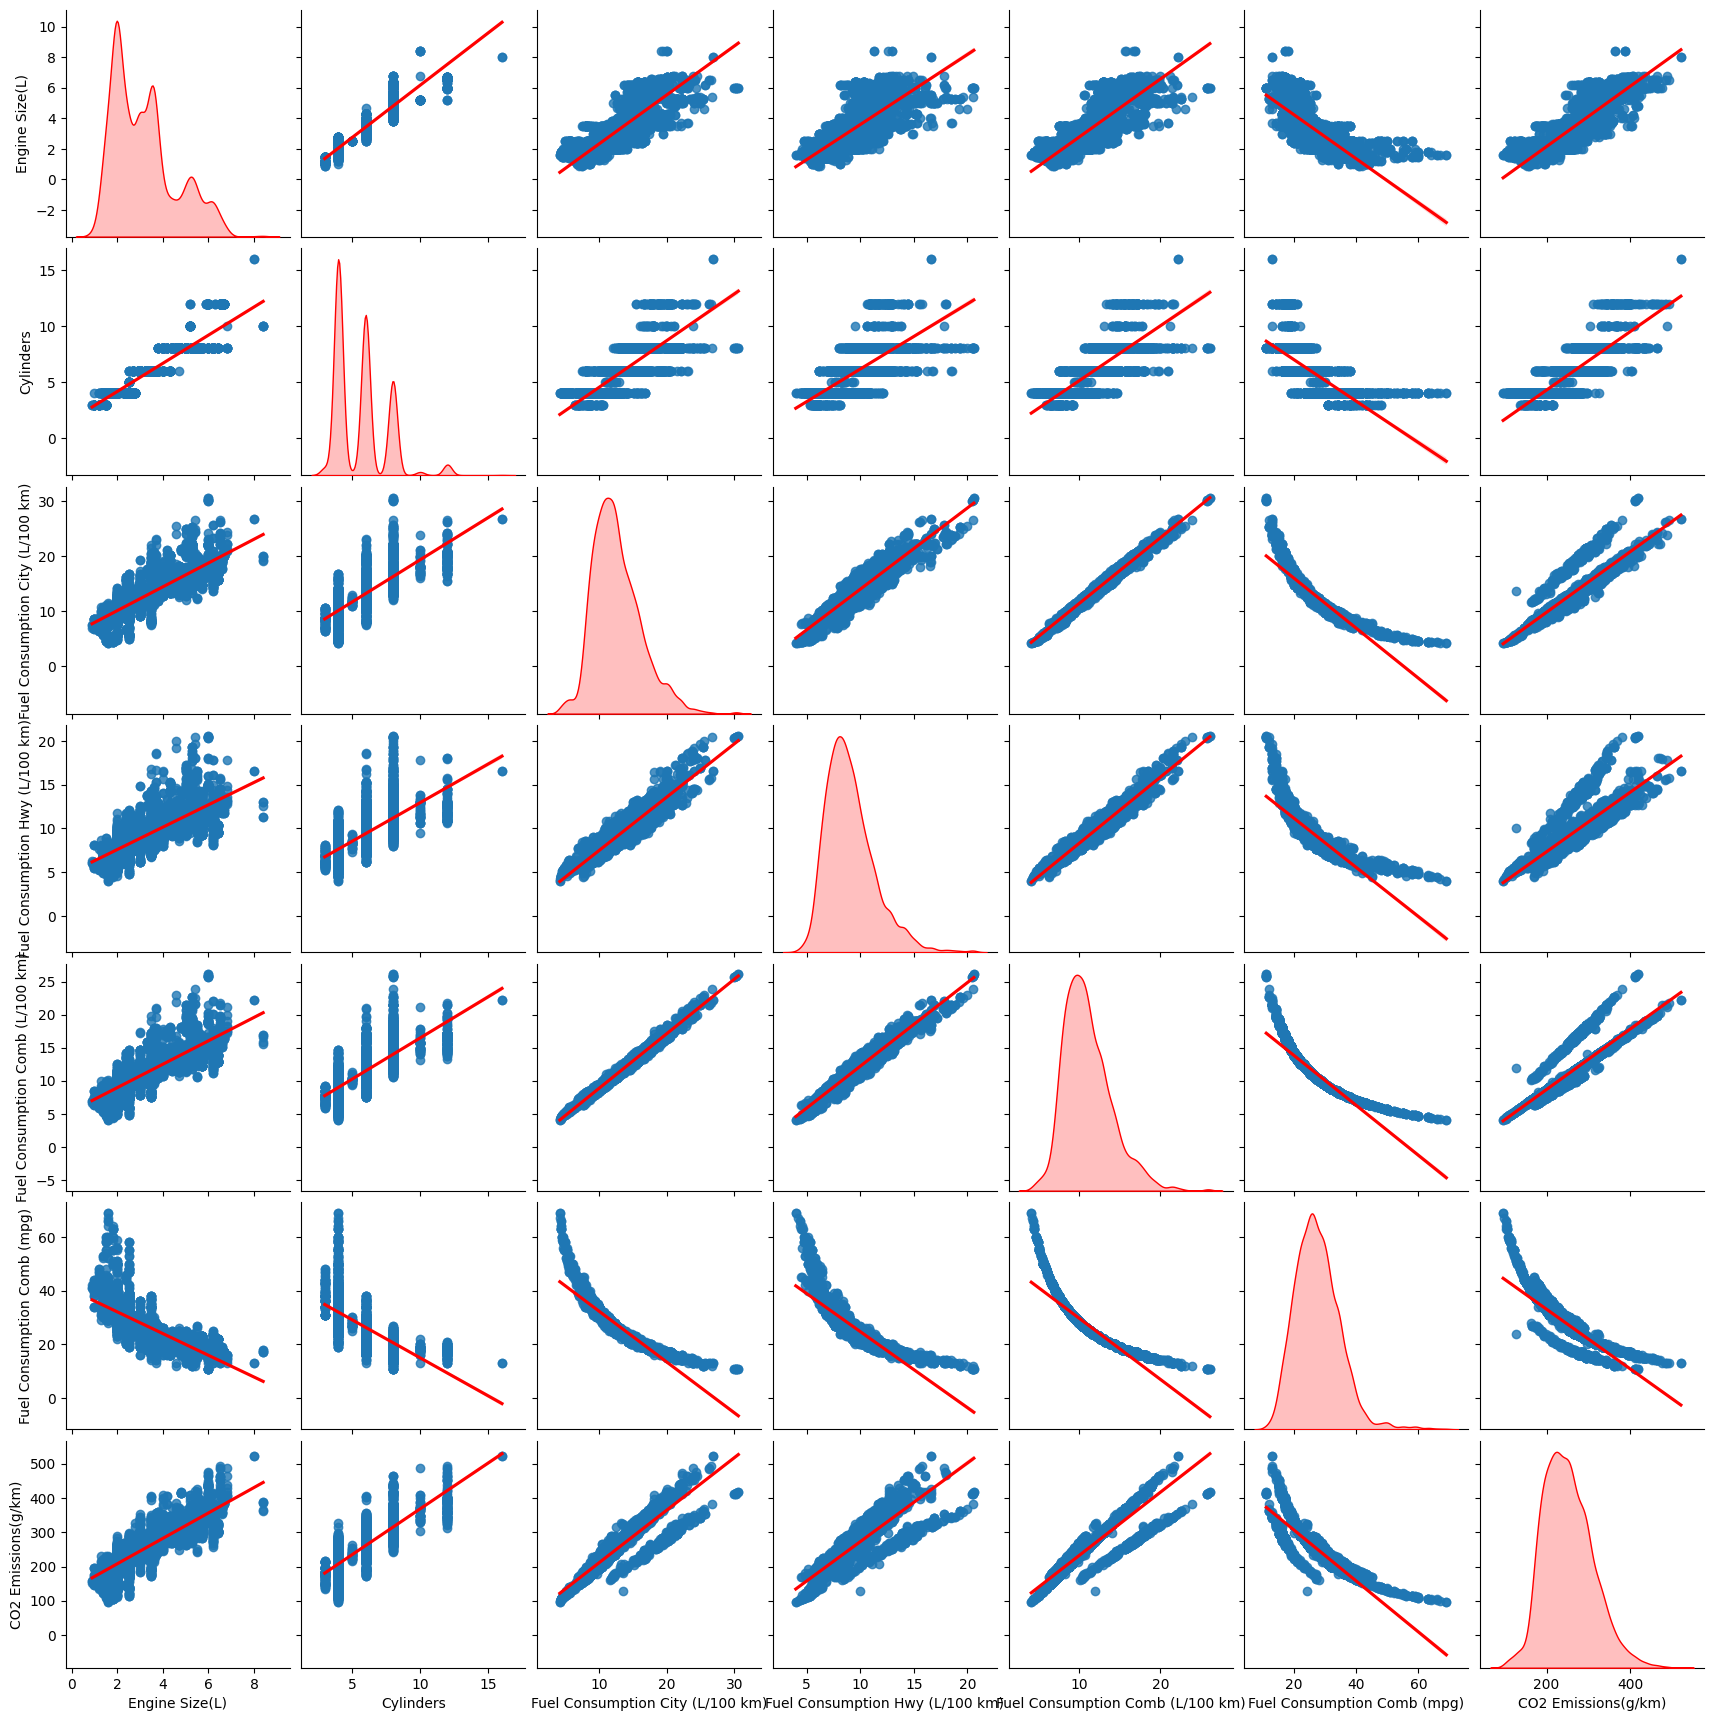

In [68]:
sns.pairplot(dataset.select_dtypes(include=np.number), kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}})
plt.show()

## Renaming Columns in the dataset

In [ ]:
# Change the column names and makes them useful for the future
renamed_columns = {
  'Make' : "make",
  'Model' : 'model',
  'Vehicle Class': 'vehicle_class',
  'Engine Size(L)': 'engine_size',
  'Cylinders': 'cylinders',
  'Transmission' : 'transmission',
  'Fuel Type': 'fuel_type',
  'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
  'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
  'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
  'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
  'CO2 Emissions(g/km)': 'co2'
}
dataset.rename(renamed_columns, axis='columns', inplace=True)

# ***2. ML Model 1***

# ***3. ML Model 2***



# ***4. ML Model 3***

# ***5. ML Model 4 (Based on research literature)***

# ***6. Comparison of insights drawn from the models***

# **_7. References_**

1.   List item
2.   List item

